[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaziogallo/data-mining/blob/aa20-21/tutorials/data/handling-missing-data.ipynb)


# Handling Missing Data

The difference between 
* data found in many **tutorials** and 
* data in the **real world** 

is that real-world data is `rarely clean and homogeneous`.

In particular, many interesting datasets will have some amount of **data missing**.

Here we'll refer to missing data in general as *null*, *NaN*, or *NA* values.

## Preprocessing in Data Mining

* One of the important stages of data mining is preprocessing, where we prepare the data for mining. 
* Real-world data tends to be 
  * incomplete, 
  * noisy, 
  * inconsistent 

* An important task when preprocessing the data is to 
  * fill in missing values, 
  * smooth out noise 
  * correct inconsistencies.

## Find missing values in the dataset

Missing values could be: 
* NaN, empty string, ?,-1,-99,-999 and so on. 
* In order to understand if -1 is a missing value or not we could **draw a histogram**. 

If this variable has a uniform distribution between 0 and 1 and it has a **small peak at -1** then -1 is actually a `missing value`.

Missing values can be hidden from us and by hidden mean replaced by some other value beside NaN.   
Therefore, it is always beneficial to plot a histogram in order to identify those values.

In [48]:
import pandas as pd

# Load the Brittleness index dataset (https://openmv.net/info/brittleness-index)
df = pd.read_csv('data/brittleness-index.csv')
df.head()

,TK104,TK105,TK107
0,254.0,263.0,338
1,440.0,NaN,470
2,501.0,NaN,558
3,368.0,451.0,426
4,697.0,709.0,733


In [43]:
df.shape  # Get the number of rows and columns

(23, 3)

In [44]:
df_nan = df.fillna(value=-99)

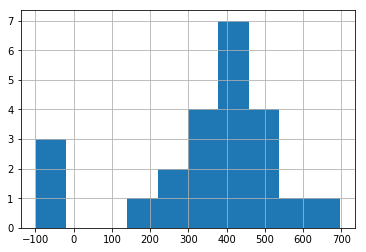

In [45]:
df_nan['TK104'].hist();

Using `dataframe.info()` we can figure out which features has missing values:
* TK104  -->  20  # 3 NULL values
* TK105  -->  21  # 2 NULL values
* TK107  -->  23  # 0 NULL values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
TK104    20 non-null float64
TK105    21 non-null float64
TK107    23 non-null int64
dtypes: float64(2), int64(1)
memory usage: 632.0 bytes


## Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed


In case the **number of features is small** we can easily understand that 
* features ‘TK104’ and ‘TK105’ contain missing values.

In [50]:
df.isnull().sum()

TK104    3
TK105    2
TK107    0
dtype: int64

In [51]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
TK104,3,0.130435
TK105,2,0.086957
TK107,0,0.000000


## How can you handle missing values?

* There are **several techniques** that can be used. 
* Choosing the right technique is a choice that **depends on the problem domain**,

## 1) Ignore the data row

This is usually done when 
* the **class label** is missing (for classification), 
* many **attributes** are missing from the row (not just one). 

We will get poor performance if the percentage of such rows is high.

### Example

Our goal is to build a model predicting a **student’s success** in college. 
* Data rows who are **missing** the **success column** are not useful in predicting success  
  so they could very well be ignored and removed before running the algorithm.

### Ignore rows or columns using Pandas
Using `dropna()` 
* `df.dropna(axis=0)`  # Drop rows which contain missing values  (default).
* `df.dropna(axis=1)`  # Drop columns which contain missing value.

In [52]:
# Drop rows with any empty cells
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,TK104,TK105,TK107
0,254.0,263.0,338
3,368.0,451.0,426
4,697.0,709.0,733
5,476.0,542.0,539
6,188.0,223.0,240
7,525.0,659.0,628
8,451.0,689.0,517
9,517.0,509.0,564
10,370.0,321.0,435
14,396.0,492.0,429


## 2) Use a global constant to fill in for missing values

Decide on a new global constant value, like 
* “unknown“, 
* “N/A”
* minus infinity
* etc.

that will be used to fill all the missing values.

`fillna()` can “fill in” NA values with non-NA data

In [53]:
import numpy as np

df2 = pd.DataFrame(
    np.random.randn(5, 3),
    index=["a", "c", "e", "f", "h"],
    columns=["one", "two", "three"],
)
df2 = df2.reindex(["a", "b", "c", "d", "e", "f", "g", "h"])
df2.head()

,one,two,three
a,0.625512,1.107741,1.020654
b,NaN,NaN,NaN
c,1.337927,2.407367,0.537735
d,NaN,NaN,NaN
e,1.199070,0.836215,-1.146186


In [55]:
# Replace NA with a scalar value
df2.fillna(0)

,one,two,three
a,0.625512,1.107741,1.020654
b,0.000000,0.000000,0.000000
c,1.337927,2.407367,0.537735
d,0.000000,0.000000,0.000000
e,1.199070,0.836215,-1.146186
f,1.087430,-0.107765,-2.005480
g,0.000000,0.000000,0.000000
h,2.005766,0.214852,0.013998


In [56]:
# Replace NA with a label
df2.fillna("missing")

,one,two,three
a,0.625512,1.10774,1.02065
b,missing,missing,missing
c,1.33793,2.40737,0.537735
d,missing,missing,missing
e,1.19907,0.836215,-1.14619
f,1.08743,-0.107765,-2.00548
g,missing,missing,missing
h,2.00577,0.214852,0.0139977


In [57]:
# Replace NA with a label for a single column
df2['two'].fillna("missing")

a     1.10774
b     missing
c     2.40737
d     missing
e    0.836215
f   -0.107765
g     missing
h    0.214852
Name: two, dtype: object

### Example

Let’s look at the **students enrollment** dataset again. 
* Assuming the `state of residence` attribute data is missing for some students. 
* Filling it up with some state doesn’t really makes sense as opposed to using something like “N/A”.

## 3) Use attribute mean

Replace missing values of an attribute with 
* the **mean** value, it it is continue (real number)
* the **median** value, if its discrete 
* the **mode**...

### Example

In a dataset of **US family incomes**,   
if the average income of a US family is X you can use that value to replace missing income values.

In [58]:
df.mean()

TK104    421.000000
TK105    472.190476
TK107    470.086957
dtype: float64

In [59]:
df_filled = df.fillna(df.mean())
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
TK104    23 non-null float64
TK105    23 non-null float64
TK107    23 non-null int64
dtypes: float64(2), int64(1)
memory usage: 632.0 bytes


## 4) Use attribute mean for all samples belonging to the same class

Instead of using the mean (or median) of a certain attribute calculated by looking at all the rows, we can limit the calculations to the **relevant class** to make the value more relevant to the row we’re looking at.

In [60]:
d = {'col1': ['a', 'b', 'a', 'a', 'b', 'a'], 'col2': [3, 4, None, 5, None, 7], 'col3':[4,5,6,7,8,6]}
df3 = pd.DataFrame(data=d)
df3.head(6)

,col1,col2,col3
0,a,3.0,4
1,b,4.0,5
2,a,NaN,6
3,a,5.0,7
4,b,NaN,8
5,a,7.0,6


In [ ]:
df3["col2"] = df3.groupby("col1").transform(lambda x: x.fillna(x.mean()))
df3.head()

* the Nan values in col2 were replaced with the mean of the class in col1. 
* For example index two became 5 which is (3+5+7)/3 and index 4 became 4, which is 4/1. 

### Example

Let’s say you have a **cars pricing** dataset that, among other things, classifies cars to 
* “Luxury” and “Low budget” 

and you’re dealing with missing values in the cost field. 

Replacing missing cost of a luxury car with the average cost of all luxury cars is probably more accurate than the value you’d get if you factor in the low budget cars.

## 5) Use a data mining algorithm to predict the most probable value
This is one of the **best and most efficient method** for handling missing data.   
Depending on the class of data that is missing,  
one can either use a **regression** model or **classification** to predict missing data.

The missing value can be determined using 
* regression, 
* inference based tools using Bayesian formalism, 
* decision trees, 
* clustering algorithms (K-Mean\Median etc.).

### Example

we could use 
* **clustering algorithms** to create clusters of rows which will then be used for calculating an attribute mean or median as specified in technique (3).
* **decision tree** to try and predict the probable value in the missing attribute, according to other attributes in the data.

### Pandas example using Titanic dataset
Thus, we are going to fit a linear model and we will try to **predict the missing values** of the ‘`Age`’ feature.

We used a `Linear regression` model to replace the nulls in the feature ‘Age’. 

In [61]:
df2 = pd.read_csv('data/titanic.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data = df2[['Pclass','SibSp','Parch','Fare','Age']]

#Step-1: Split the dataset that contains the missing values and no missing values 
#        are test and train respectively.
x_train = data[data['Age'].notnull()].drop(columns='Age')
y_train = data[data['Age'].notnull()]['Age']
x_test = data[data['Age'].isnull()].drop(columns='Age')
y_test = data[data['Age'].isnull()]['Age']
#Step-2: Train the machine learning algorithm
linreg.fit(x_train, y_train)
#Step-3: Predict the missing values in the attribute of the test data.
predicted = linreg.predict(x_test)
#Step-4: Let’s obtain the complete dataset by combining with the target attribute.
df2.Age[df2.Age.isnull()] = predicted
df2.info()

 ## 6) Using Algorithms Which Support Missing Values
 
* `KNN` is a machine learning algorithm which works on the principle of distance measure. 
  * This algorithm can be used when there are **nulls** present in the dataset. 
  * While the algorithm is applied, **KNN considers the missing values by taking the majority of the K nearest values**. 
  * In the **titanic** dataset, taking into account the person’s age, sex, class etc, **we will assume that people having same data for the above mentioned features will have the same kind of** `fare`.

Unfortunately, the **SciKit Learn** library for the K-Nearest Neighbour algorithm in Python does not support the presence of the missing values.

Another algorithm which can be used here is `RandomForest`. 
* This model produces a robust result because it works well on non-linear and the categorical data. 
* It adapts to the data structure taking into consideration of the high variance or the bias, producing better results on large datasets.

<div class="alert alert-success">
    
## Practice 
* Use attribute mean for all samples belonging to the same class `Survived`
* Use the attribute `Age` of the Titanic dataset
</div>

In [ ]:
# %load exercises/handling_missing_data.py


## Additional material

* [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/missing_data.html)